<a href="https://colab.research.google.com/github/Sourabhpatel1/Capstone-Project-EDA-AlmaBatter/blob/main/Copy_of_Telecom_Churn_Analysis%20-%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
# Setting pd option to stop displaying floats in scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# Setting figuresize for the seaborn plots
# Ajust the plots by changing the values to suit your screen size
sns.set(rc={'figure.figsize':(20,10)})

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# loading data
churn_data = pd.read_csv("/content/drive/MyDrive/Copy of Telecom Churn.csv")

In [6]:
# checking null values and column info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<p>There are no null Values in the Columns.</p> 
<p>Thus there is no need to handle null values.</p>
<p> There are 16 numerical columns (8 float 64 and 8 int64), 3 object (text/categorical) columns and 1 column with boolean (True/False) datatype </p> 

 

In [7]:
# Checking the number of columns

print(churn_data.columns)
print(f"\n There are {len(churn_data.columns)} columns in the dataset")

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

 There are 20 columns in the dataset


In [8]:
# checking the head
churn_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.10000,110,45.07000,197.40000,99,16.78000,244.70000,91,11.01000,10.00000,3,2.70000,1,False
1,OH,107,415,No,Yes,26,161.60000,123,27.47000,195.50000,103,16.62000,254.40000,103,11.45000,13.70000,3,3.70000,1,False
2,NJ,137,415,No,No,0,243.40000,114,41.38000,121.20000,110,10.30000,162.60000,104,7.32000,12.20000,5,3.29000,0,False
3,OH,84,408,Yes,No,0,299.40000,71,50.90000,61.90000,88,5.26000,196.90000,89,8.86000,6.60000,7,1.78000,2,False
4,OK,75,415,Yes,No,0,166.70000,113,28.34000,148.30000,122,12.61000,186.90000,121,8.41000,10.10000,3,2.73000,3,False


In [9]:
# checking the tail
churn_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.20000,77,26.55000,215.50000,126,18.32000,279.10000,83,12.56000,9.90000,6,2.67000,2,False
3329,WV,68,415,No,No,0,231.10000,57,39.29000,153.40000,55,13.04000,191.30000,123,8.61000,9.60000,4,2.59000,3,False
3330,RI,28,510,No,No,0,180.80000,109,30.74000,288.80000,58,24.55000,191.90000,91,8.64000,14.10000,6,3.81000,2,False
3331,CT,184,510,Yes,No,0,213.80000,105,36.35000,159.60000,84,13.57000,139.20000,137,6.26000,5.00000,10,1.35000,2,False
3332,TN,74,415,No,Yes,25,234.40000,113,39.85000,265.90000,82,22.60000,241.40000,77,10.86000,13.70000,4,3.70000,0,False


In [10]:
# Getting Overview of the Dataset
churn_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,101.06481,437.18242,8.09901,179.77510,100.43564,30.56231,200.98035,100.11431,17.08354,200.87204,100.10771,9.03932,10.23729,4.47945,2.76458,1.56286
std,39.82211,42.37129,13.68837,54.46739,20.06908,9.25943,50.71384,19.92263,4.31067,50.57385,19.56861,2.27587,2.79184,2.46121,0.75377,1.31549
min,1.00000,408.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,23.20000,33.00000,1.04000,0.00000,0.00000,0.00000,0.00000
25%,74.00000,408.00000,0.00000,143.70000,87.00000,24.43000,166.60000,87.00000,14.16000,167.00000,87.00000,7.52000,8.50000,3.00000,2.30000,1.00000
50%,101.00000,415.00000,0.00000,179.40000,101.00000,30.50000,201.40000,100.00000,17.12000,201.20000,100.00000,9.05000,10.30000,4.00000,2.78000,1.00000
75%,127.00000,510.00000,20.00000,216.40000,114.00000,36.79000,235.30000,114.00000,20.00000,235.30000,113.00000,10.59000,12.10000,6.00000,3.27000,2.00000
max,243.00000,510.00000,51.00000,350.80000,165.00000,59.64000,363.70000,170.00000,30.91000,395.00000,175.00000,17.77000,20.00000,20.00000,5.40000,9.00000


<h1><strong> Dataset in a Glance</strong><h1>

> The describe function without any parameters
returns the description of only numerical columns. For analysing the Categorical and Boolean data the describe function has to be called with specific parameters, which has been done in the next cell

---


<ol>
  <li>Average account lenghth is approximately 101 days.</li>
  <li>Although the average number of calls in all three timeblocks i.e. Day, Evening, Night is 100 but the average duration of calls varies significantly with time of the day.</li>
  <li>Average call duration during day is 179.77 minutes, during evening it is 200 minutes on an average and 200 minutes on an average during the night.</li>
  <li>The mean value of number of voicemails per customer is 8 on an average, however, the standard deviation is very high suggesting that the number of customers availing voicemail serveces are very few and sporadic.</li>
  <li> Average international minutes is around 10 minutes per customer and average international call per customer is 4 suggesting that very few customers call internationally.</li>
</ol>


In [11]:
# Getting overview of the categorical and boolean data columns

churn_data.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


<h1><strong>Categorical Data at a glance</strong></h1>
<ol>
  <li>There are 51 unique states in the datatset with State Code WV having the most number of subscribers i.e. 106 subscribers.</li>
  <li>Out of the 3333 subscribers 3010 subscribers do not have a International Plan.</li>
  <li>Out of 3333 subscribers 2411 dont have a voice mail plan.</li>
  <li> Out of 3333 subscribers 483 subscribers have stoppped using the services of the company.</li>
  <li> 14.50 percent of subscribers have stooped using the services of the comapny thus churn rate of the comapny is 14.50 % which is very high.</li>
</ol>


In [12]:
# Making extra columns for finding out the per minute tariff for Day, Evening and Night charges.

churn_data['Day tariff'] = round(churn_data['Total day charge']/churn_data['Total day minutes'],2)
churn_data['Eve tariff'] = round(churn_data['Total eve charge']/churn_data['Total eve minutes'],2)
churn_data['Night tariff'] = round(churn_data['Total night charge']/churn_data['Total night minutes'],2)
churn_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Day tariff,Eve tariff,Night tariff
0,KS,128,415,No,Yes,25,265.10000,110,45.07000,197.40000,99,16.78000,244.70000,91,11.01000,10.00000,3,2.70000,1,False,0.17000,0.09000,0.04000
1,OH,107,415,No,Yes,26,161.60000,123,27.47000,195.50000,103,16.62000,254.40000,103,11.45000,13.70000,3,3.70000,1,False,0.17000,0.09000,0.05000
2,NJ,137,415,No,No,0,243.40000,114,41.38000,121.20000,110,10.30000,162.60000,104,7.32000,12.20000,5,3.29000,0,False,0.17000,0.08000,0.05000
3,OH,84,408,Yes,No,0,299.40000,71,50.90000,61.90000,88,5.26000,196.90000,89,8.86000,6.60000,7,1.78000,2,False,0.17000,0.08000,0.04000
4,OK,75,415,Yes,No,0,166.70000,113,28.34000,148.30000,122,12.61000,186.90000,121,8.41000,10.10000,3,2.73000,3,False,0.17000,0.09000,0.04000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.20000,77,26.55000,215.50000,126,18.32000,279.10000,83,12.56000,9.90000,6,2.67000,2,False,0.17000,0.09000,0.05000
3329,WV,68,415,No,No,0,231.10000,57,39.29000,153.40000,55,13.04000,191.30000,123,8.61000,9.60000,4,2.59000,3,False,0.17000,0.09000,0.05000
3330,RI,28,510,No,No,0,180.80000,109,30.74000,288.80000,58,24.55000,191.90000,91,8.64000,14.10000,6,3.81000,2,False,0.17000,0.09000,0.05000
3331,CT,184,510,Yes,No,0,213.80000,105,36.35000,159.60000,84,13.57000,139.20000,137,6.26000,5.00000,10,1.35000,2,False,0.17000,0.09000,0.04000


In [13]:
# Checking the average number of customer service calls between the people who have opted out of service.
churn_service_calls = pd.DataFrame(churn_data.groupby("Churn")["Customer service calls"].mean())
churn_service_calls

,Customer service calls
Churn,
False,1.44982
True,2.22981


In [14]:
# Ratio of Customer service calls between subscribers who continue to use the service and who have stopped using the operators services.
churn_false = float(churn_service_calls.loc[False])
churn_true = float(churn_service_calls.loc[True])

churn_service_call_ratio = churn_true/churn_false
round(churn_service_call_ratio, 2)

1.54

In [15]:
service_calls_churn = pd.DataFrame(churn_data.loc[churn_data["Churn"] == True, "Customer service calls"])
service_calls_churn.describe()

,Customer service calls
count,483.00000
mean,2.22981
std,1.85327
min,0.00000
25%,1.00000
50%,2.00000
75%,4.00000
max,9.00000


In [16]:
service_calls_nonchurn = pd.DataFrame(churn_data.loc[churn_data["Churn"] == False, "Customer service calls"])
service_calls_nonchurn.describe()

,Customer service calls
count,2850.00000
mean,1.44982
std,1.16388
min,0.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,8.00000


<h1><strong>Number of Service Calls<strong></h1>
<ol>
  <li>The subscribers who have stopped using the service of the operator have called 1.54 times more than the subscribers who continue to use the services of the operator.</li>
  <li>The high numbers of service calls may be due to poor quality of service or due to lack of attentive and friendly call center executives.</li>
  <li>If we look at the 75th Quartile in the service calls for subscribers who have left and who continue to use the services we see that the people who have left called twice as much when compared to the people who are continuing to use the services.</li>
</ol>

In [17]:
# Converting Categorical Columns into numerical columns

# Looking for categorical columns
categorical_cols = [cols for cols in churn_data.columns if churn_data[cols].dtype == 'O']
categorical_cols

['State', 'International plan', 'Voice mail plan']

In [18]:
# There are Three Categorical columns in the Dataframe i.e. State, International Plan and Voce mail plan
# Checking if these can be converted into numerical features
churn_data[["State", "International plan", "Voice mail plan"]]

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
3328,AZ,No,Yes
3329,WV,No,No
3330,RI,No,No
3331,CT,Yes,No


In [19]:
#International Plan and Voice mail plan are simple yes and no and thus they can be encoded as 1 or 0 for yes and no respectively.
# Canging yes value to 1 and No value to 0 in both the International Plan and Voice mail plan.
churn_data["International plan"] = np.where(churn_data["International plan"] == "Yes",1,0)
churn_data["Voice mail plan"] = np.where(churn_data["Voice mail plan"] == "Yes",1,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


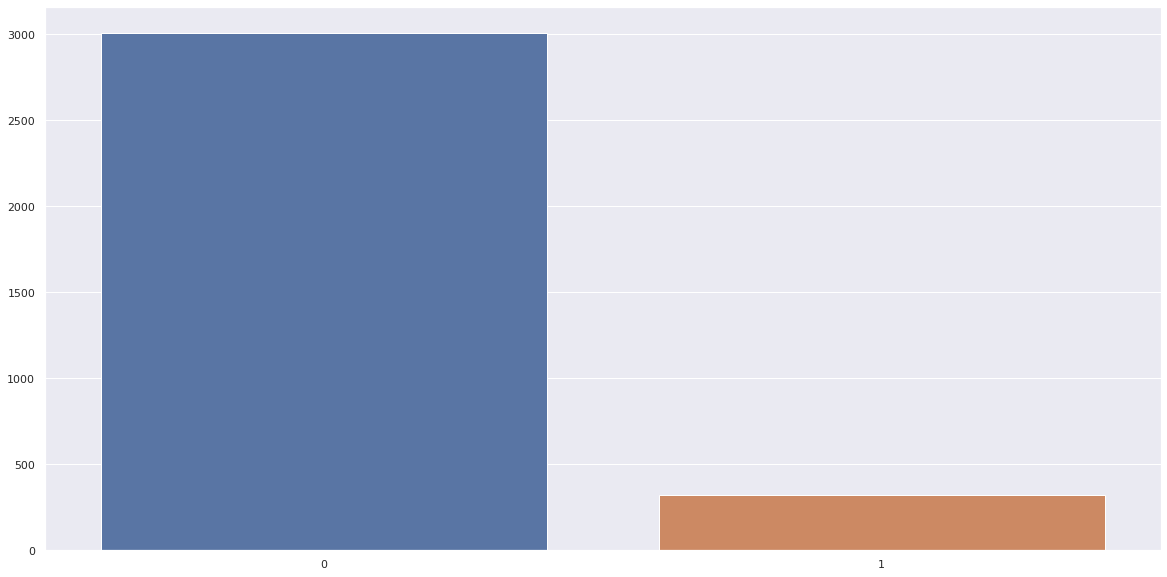

In [20]:
#Using Bar plot to find out number of Customers with International plan active vs number of customers who are not using an international plan
v_counts_international = churn_data["International plan"].value_counts()
sns.barplot(v_counts_international.index, v_counts_international.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


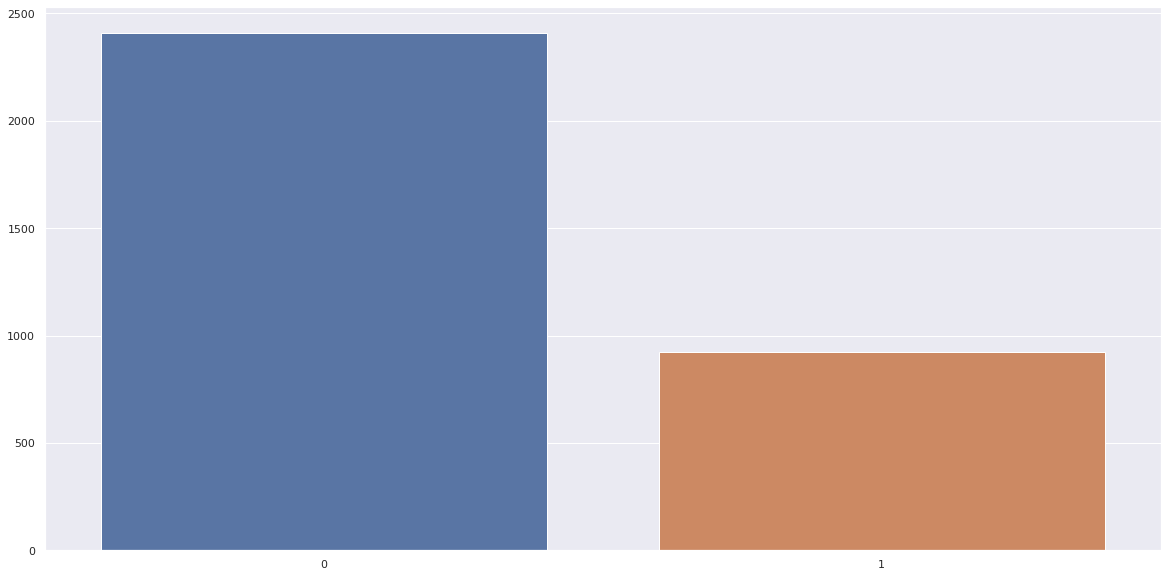

In [21]:
v_count_voice = churn_data["Voice mail plan"].value_counts()
sns.barplot(v_count_voice.index, v_count_voice.values)

In [22]:
churn_data.groupby(["Churn", "International plan"])["International plan"].count()

Churn  International plan
False  0                     2664
       1                      186
True   0                      346
       1                      137
Name: International plan, dtype: int64

In [23]:
churn_col = churn_data["Churn"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


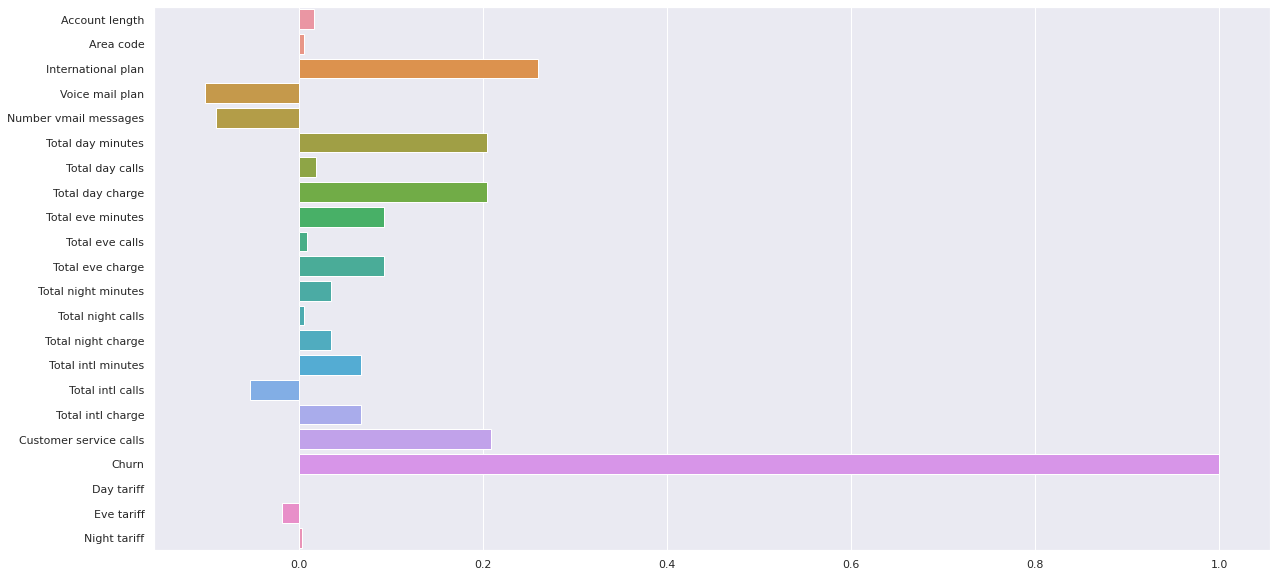

In [24]:
# Plotting the correlation of other columns W.R.T. the Churn column to see the effect of columsn on churn
sns.barplot(churn_data.corrwith(churn_col).values, churn_data.corrwith(churn_col).index)

<h1><strong>Insights from the correlation graph above<strong><h1>
<ol>
  <li>International Plan, Total Day Charge, Total Evening Charge, Total International Charge and Customers service calls have a strong positive correlation with churn.</li>
  <li>Voice mail plan, Number of Voicemail messages and Total international calls have a strong negetive correlation with churn.</li>
  <li>Night time calling seems to have minimal impact on the churn rate hence it may not be worth analyzing it in-depth.</li>
  <li>The approach from hereon would be look at the churn rate from the perspective of categorical columsn i.e. State, International plan and voicemail plan</li>
  <li>Then we'll analyze the numerical features for better insight into what might actually be causing the churn.</li>
</ol>

In [25]:
# we alrady have our categorical colums now making a list of numerical columns to better access the data.
# Although area code is numerical data type but it actually is categorical so we add it to the categorical column
categorical_cols.append("Area code")
num_cols = [col for col in churn_data if col not in categorical_cols]
num_cols

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn',
 'Day tariff',
 'Eve tariff',
 'Night tariff']

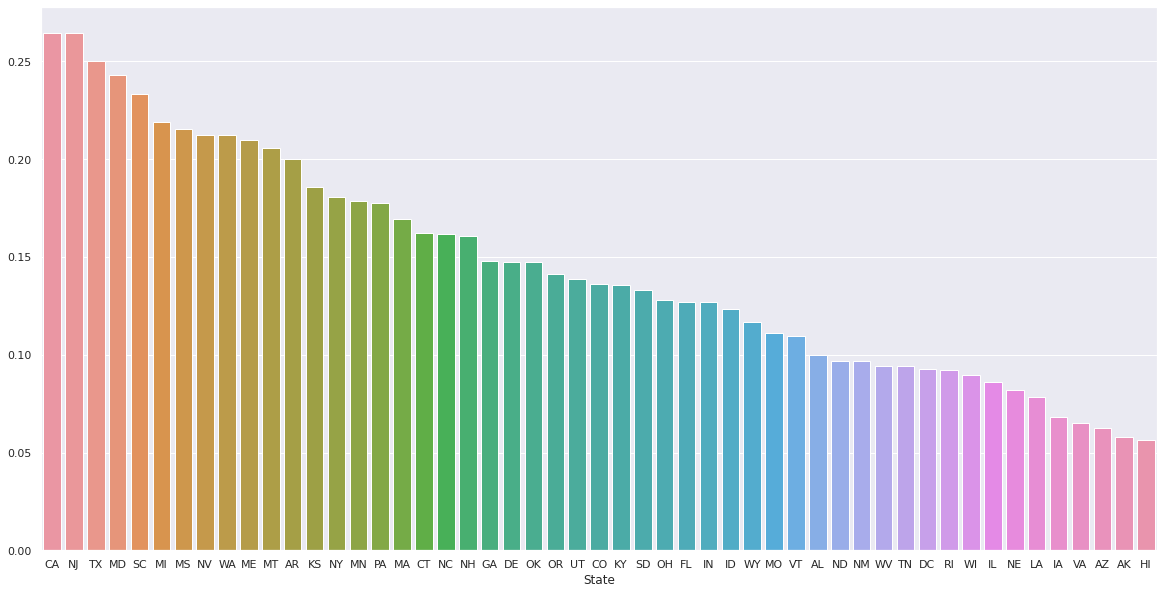

In [26]:
# Looking at the State column and churn
churn_by_state = churn_data.groupby("State")["Churn"].mean().sort_values(ascending=False)
sns.barplot(x = churn_by_state.index, y = churn_by_state.values)

In [27]:
# Setting the figure size for the matplotlib library
# Change this as per your screen size and resolution
plt.rcParams["figure.figsize"] = (20, 10)

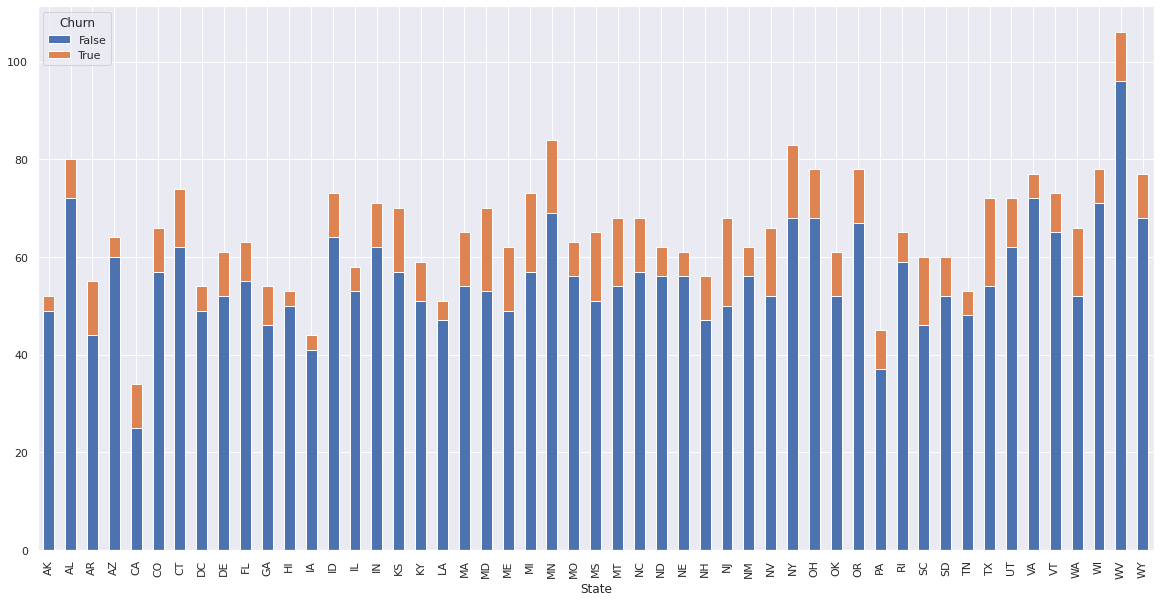

In [28]:
churn_state = pd.DataFrame(churn_data.groupby("State")["Churn"].value_counts().unstack())
churn_state.plot(kind="bar", stacked = True)

In [34]:
# Number of average subsricers lost by each 
# Mean churn is the average of True values
mean_churn_of_states = churn_state.mean()
mean_churn_of_states

Churn
False   55.88235
True     9.47059
dtype: float64

In [35]:
# Getting average number of subscribers in each state
mean_cust_by_state = churn_data.groupby("State")["State"].count().mean()
mean_cust_by_state

65.3529411764706

In [37]:
# Percentage rate of churn of all states
p_churn_of_state = (mean_churn_of_states/mean_cust_by_state)*100
p_churn_of_state

Churn
False   85.50855
True    14.49145
dtype: float64

<h1>Churn by State</h1>
<ol>
  <li>From the above two graphs it is clearly seen that the CA, NJ, TZ, MD and SC are the top five states which have a churn rate of more than or around 25%. These states have lost 1/4th of the customer base in the period to which the data pertains to.</li>
  <li>HI, AK, AZ, VA and IA are the fve states with lowest rate of churn of around 5% or lower. These states have a loyal customer base</li>
  <li>On an average the telecom operator has lost an average of 9.5 subscribers from each state</li>
  <li>There are 65 subscibers on an average from each state</li>
  <li>On an average states have lost 14.50% of their subscribers in the period.</li>
</ol>

In [40]:
# checking the relationship of voicemail plan with the rate of churn
v_group = churn_data.loc[churn_data["Voice mail plan"] == 1].groupby("Voice mail plan")["Churn"].value_counts().unstack()
v_group

Churn,False,True
Voice mail plan,,
1,842,80


Total customers who have an active Voicemail Plan is 922

Churn Rate by Voice mail plan is 8.68 %


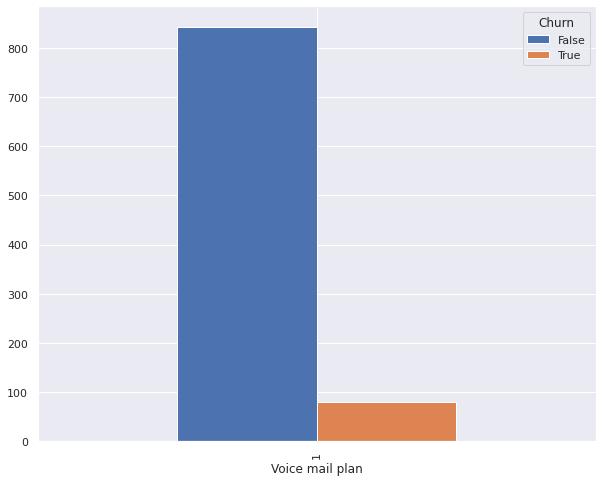

In [72]:
total_cust_by_vplan = v_group[False] + v_group[True]
print(f"Total customers who have an active Voicemail Plan is {total_cust_by_vplan.values[0]}\n")
churn_rate_by_vplan = (v_group[True]/total_cust_by_vplan)*100
print(f"Churn Rate by Voice mail plan is {round(churn_rate_by_vplan.values[0], 2)} %")
v_group.plot(kind = "bar")

Percentage of subscribers having a voice mail plan is 27.66 % our of 3333 subscribers
_______________________________________________________________________



([<matplotlib.patches.Wedge at 0x7f0ec482f950>,
 [Text(-0.7101064093897655, 0.840088618744222, 'Non Voice Plan Customers'),
  Text(0.7101064093897654, -0.8400886187442221, 'Voice Plan Customers')])

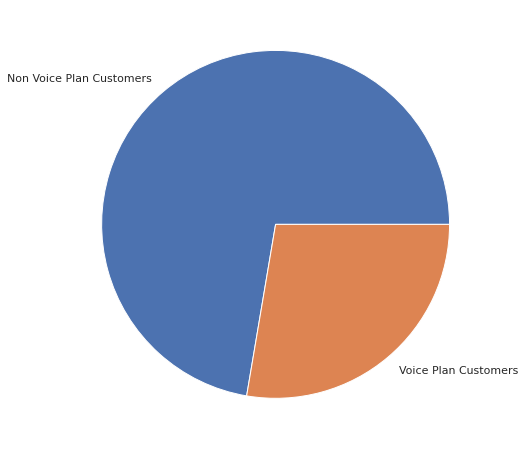

In [70]:
#setting new RC param to avoid error
plt.rcParams["figure.figsize"] = (10, 8)
#Finding Percentage of People Having Voice mail plan
total_subscribers = len(churn_data)
# Percentage of subscribers having Voice mail plan
perc_vplan = (total_cust_by_vplan.values[0] / total_subscribers)*100
print(f"Percentage of subscribers having a voice mail plan is {round(perc_vplan,2)} % our of {total_subscribers} subscribers")
print("_______________________________________________________________________\n")
plt.pie([total_subscribers-total_cust_by_vplan.values[0], total_cust_by_vplan.values[0]], labels=["Non Voice Plan Customers", "Voice Plan Customers"])

<h1>Churn Rate with respect to the Voice Plan</h1>
<ol>
  <li>27.66% or of subscribers have a Voice mail plan, 27.66% is a significant number of subscribers.</li>
  <li>Out of 922 subscribers who have an active voicemail plan 80 or 8.68% subscribers have stopped using the services of the operator.</li>
  <li>A level of unsatisfaction is obeserved when the Churn is measured in relation to the Voice mail plan.</li>
  <li>However, churn rate of 8.68% is lower than the average churn rate of 14.50% overall.</li>
  <li>Nonetheless, a deeper analysis of the operators Voice mail plan is warranted when it comes to the Churn Rate.</li>
</ol>

In [82]:
#Checking relationship of International Plan wit respect to the churn rate.

int_group = churn_data.groupby("International plan")["Churn"].value_counts().unstack()

# Total number of subscribers who have a International Plan
total_cust_int_plan = int_group.iloc[1][False] + int_group.iloc[1][False]

# Percentage of customers who have international plan.
perc_int_plan = (total_cust_int_plan / total_subscribers)*100
print(f"{round(perc_int_plan,2)}% or {total_cust_int_plan} subscribers have an international plan out of {total_subscribers} subscribers")

11.16% or 372 subscribers have an international plan out of 3333 subscribers


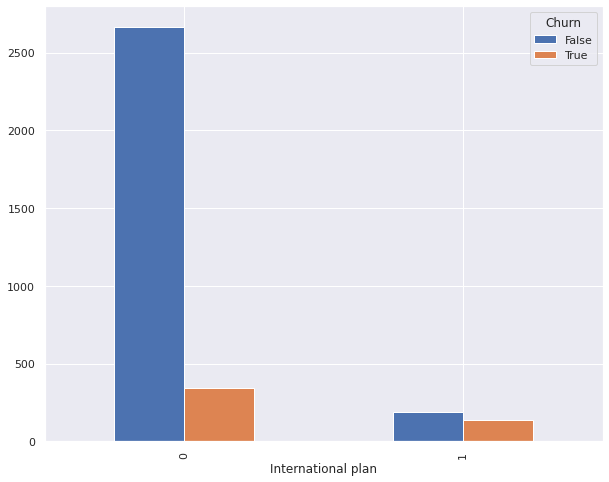

In [90]:
int_group.plot(kind='bar')